---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
jupyter: python3
---


# Documentation of the Sequential Parameter Optimization


In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

Seed set to 123


This document describes the `Spot` features. The official `spotPython` documentation can be found here: [https://sequential-parameter-optimization.github.io/spotPython/](https://sequential-parameter-optimization.github.io/spotPython/).

## An Initial Example

The `spotPython` package provides several classes of objective functions. We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
$$
f(x) = x^2.
$$


In [2]:
fun = analytical().fun_sphere

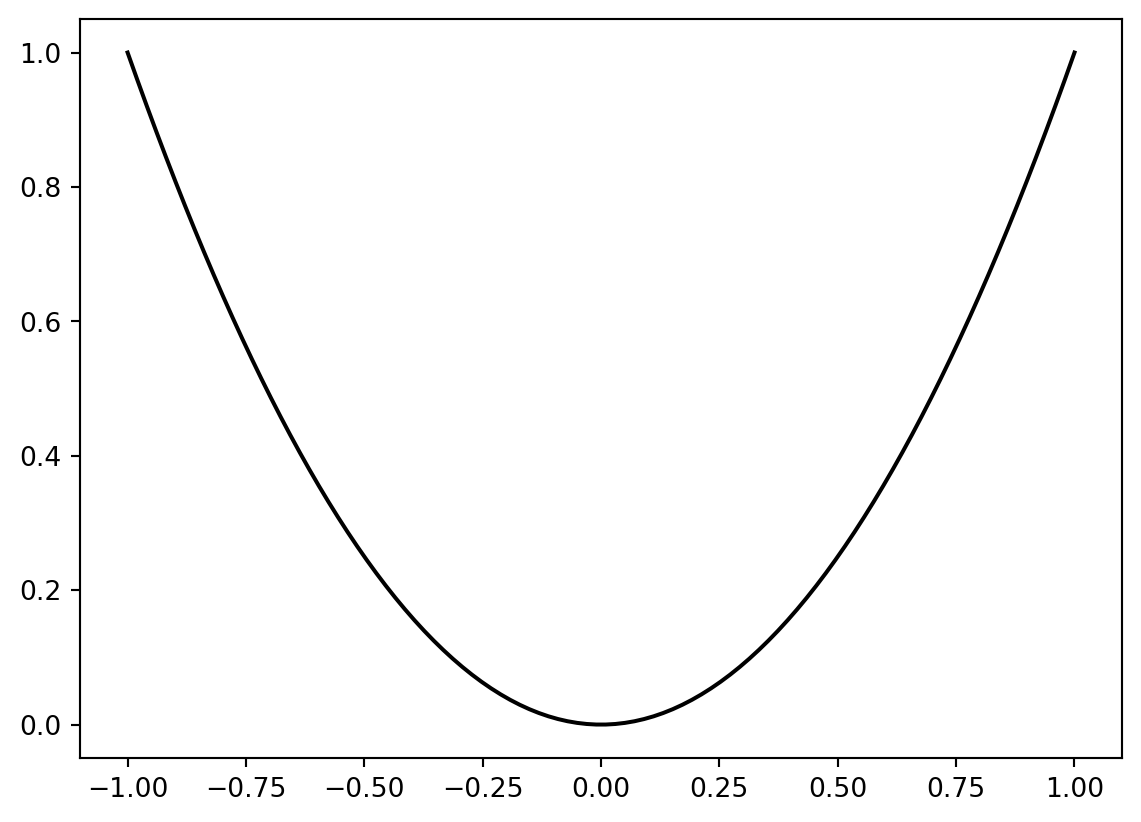

In [3]:
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x,y, "k")
plt.show()

In [4]:
from spotPython.utils.init import fun_control_init, design_control_init, surrogate_control_init, optimizer_control_init
spot_1 = spot.Spot(fun=fun,
                   fun_control=fun_control_init(
                        lower = np.array([-10]),
                        upper = np.array([100]),
                        fun_evals = 7,
                        fun_repeats = 1,
                        max_time = inf,
                        noise = False,
                        tolerance_x = np.sqrt(np.spacing(1)),
                        var_type=["num"],
                        infill_criterion = "y",
                        n_points = 1,
                        seed=123,
                        log_level = 50),
                   design_control=design_control_init(
                        init_size=5,
                        repeats=1),
                   surrogate_control=surrogate_control_init(
                        noise=False,
                        min_theta=-4,
                        max_theta=3,
                        n_theta=1,
                        model_optimizer=differential_evolution,
                        model_fun_evals=10000))
spot_1.run()

Seed set to 123


spotPython tuning: 2.0106521524877827 [#########-] 85.71% 


spotPython tuning: 0.01033163973935242 [##########] 100.00% Done...



## Organization

`Spot` organizes the surrogate based optimization process in four steps:

1. Selection of the objective function: `fun`.
2. Selection of the initial design: `design`.
3. Selection of the optimization algorithm: `optimizer`.
4. Selection of the surrogate model: `surrogate`.

For each of these steps, the user can specify an object:


In [5]:
from spotPython.fun.objectivefunctions import analytical
fun = analytical().fun_sphere
from spotPython.design.spacefilling import spacefilling
design = spacefilling(2)
from scipy.optimize import differential_evolution
optimizer = differential_evolution
from spotPython.build.kriging import Kriging
surrogate = Kriging()

For each of these steps, the user can specify a dictionary of control parameters.

1. `fun_control`
2. `design_control`
3. `optimizer_control`
4. `surrogate_control`

Each of these dictionaries has an initialzaion method, e.g., `fun_control_init()`. The initialization methods set the default values for the control parameters.

:::: {.callout-important}
#### Important:

* The specification of an lower bound in `fun_control` is mandatory.

::: 


In [6]:
from spotPython.utils.init import fun_control_init, design_control_init, optimizer_control_init, surrogate_control_init
fun_control=fun_control_init(lower=np.array([-1, -1]),
                            upper=np.array([1, 1]))
design_control=design_control_init()
optimizer_control=optimizer_control_init()
surrogate_control=surrogate_control_init()

Seed set to 123


## The Spot Object

Based on the definition of the `fun`, `design`, `optimizer`, and `surrogate` objects, 
and their corresponding control parameter dictionaries, `fun_control`, `design_control`, `optimizer_control`, and `surrogate_control`,
the `spot` object can be build as follows:


In [7]:
from spotPython.spot import spot
spot_tuner = spot.Spot(fun=fun,
                       fun_control=fun_control,
                       design_control=design_control,
                       optimizer_control=optimizer_control,
                       surrogate_control=surrogate_control)

## Run


In [8]:
spot_tuner.run()

spotPython tuning: 1.801603872454505e-05 [#######---] 73.33% 


spotPython tuning: 1.801603872454505e-05 [########--] 80.00% 


spotPython tuning: 1.801603872454505e-05 [#########-] 86.67% 


spotPython tuning: 1.801603872454505e-05 [#########-] 93.33% 


spotPython tuning: 1.801603872454505e-05 [##########] 100.00% Done...



## Print the Results


In [9]:
spot_tuner.print_results()

min y: 1.801603872454505e-05
x0: 0.0019077911677074135
x1: 0.003791618596979743


[['x0', 0.0019077911677074135], ['x1', 0.003791618596979743]]

## Show the Progress


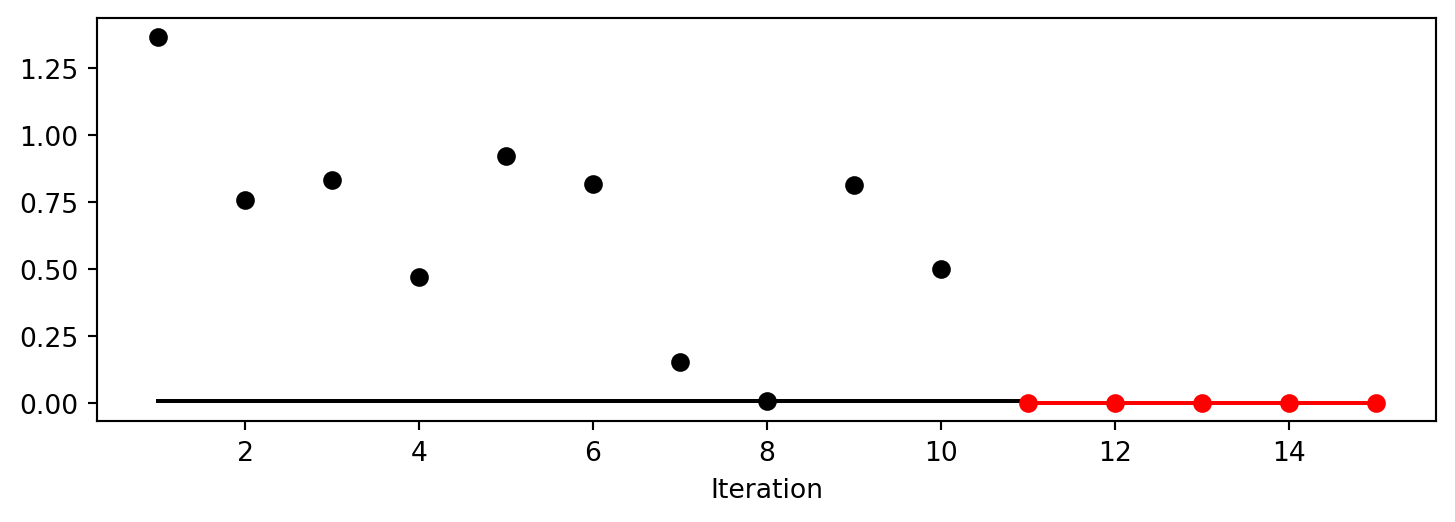

In [10]:
spot_tuner.plot_progress()

## Visualize the Surrogate

* The plot method of the `kriging` surrogate is used.
* Note: the plot uses the interval defined by the ranges of the natural variables.


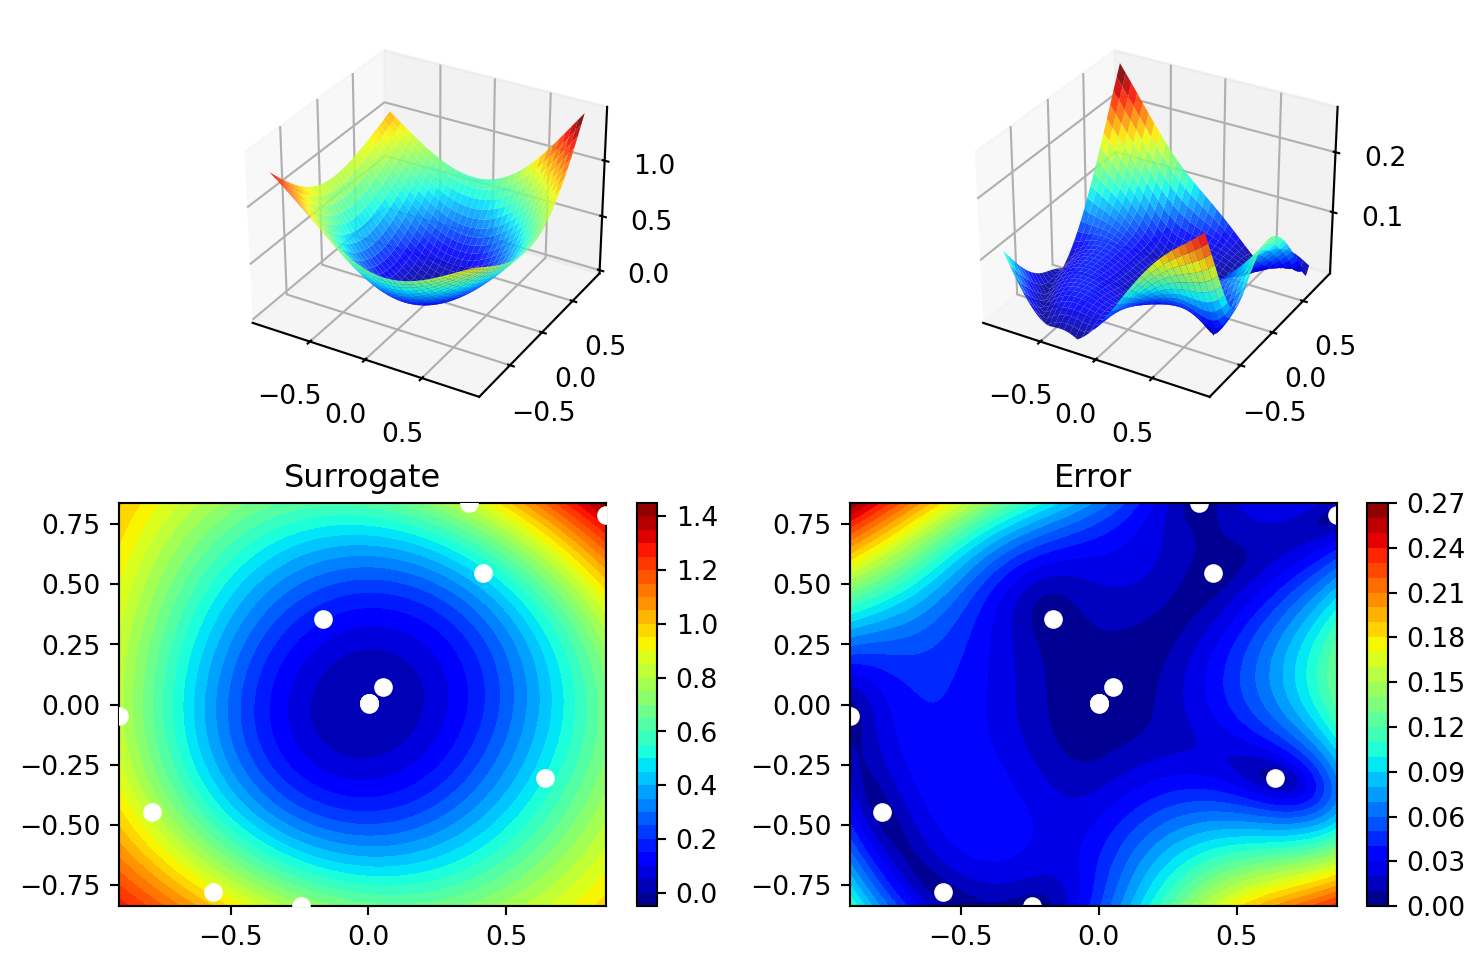

In [11]:
spot_tuner.surrogate.plot()

## Run With a Specific Start Design

To pass a specific start design, use the `X_start` argument of the `run` method.


Seed set to 123


spotPython tuning: 2.0106521524877827 [#########-] 85.71% 


spotPython tuning: 0.01033163973935242 [##########] 100.00% Done...



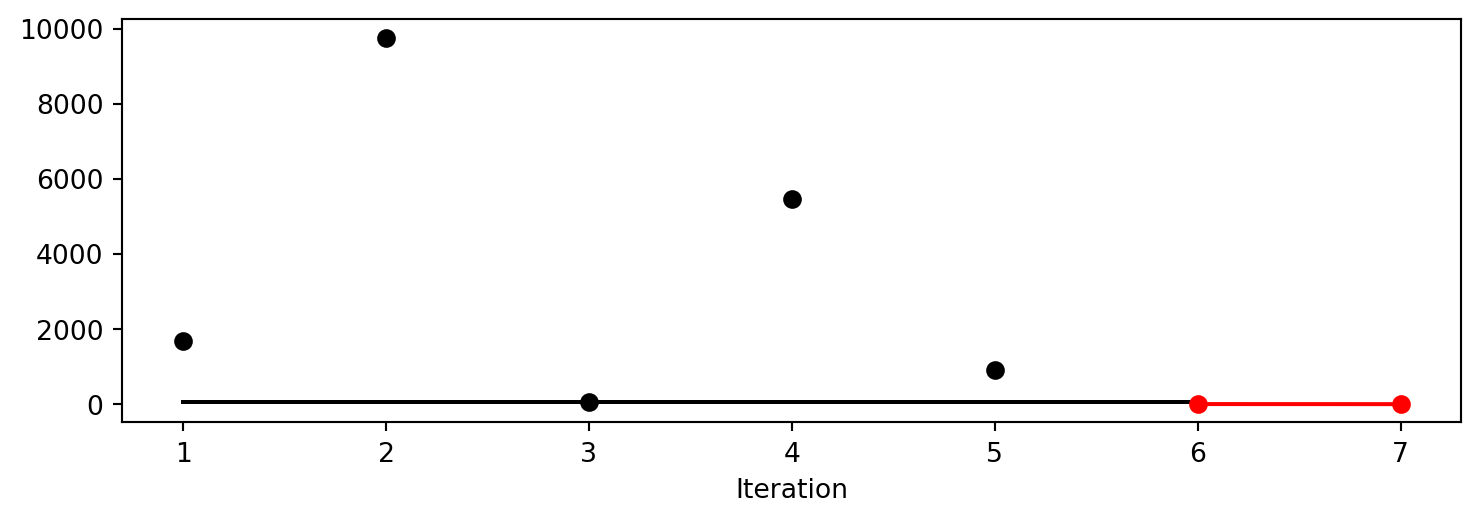

In [12]:
spot_x0 = spot.Spot(fun=fun,
                    fun_control=fun_control_init(
                        lower = np.array([-10]),
                        upper = np.array([100]),
                        fun_evals = 7,
                        fun_repeats = 1,
                        max_time = inf,
                        noise = False,
                        tolerance_x = np.sqrt(np.spacing(1)),
                        var_type=["num"],
                        infill_criterion = "y",
                        n_points = 1,
                        seed=123,
                        log_level = 50),
                    design_control=design_control_init(
                        init_size=5,
                        repeats=1),
                    surrogate_control=surrogate_control_init(
                        noise=False,
                        min_theta=-4,
                        max_theta=3,
                        n_theta=1,
                        model_optimizer=differential_evolution,
                        model_fun_evals=10000))
spot_x0.run(X_start=np.array([0.5, -0.5]))
spot_x0.plot_progress()

## Init: Build Initial Design


In [13]:
from spotPython.design.spacefilling import spacefilling
from spotPython.build.kriging import Kriging
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init
gen = spacefilling(2)
rng = np.random.RandomState(1)
lower = np.array([-5,-0])
upper = np.array([10,15])
fun = analytical().fun_branin

fun_control = fun_control_init(sigma=0)

X = gen.scipy_lhd(10, lower=lower, upper = upper)
print(X)
y = fun(X, fun_control=fun_control)
print(y)

Seed set to 123


[[ 8.97647221 13.41926847]
 [ 0.66946019  1.22344228]
 [ 5.23614115 13.78185824]
 [ 5.6149825  11.5851384 ]
 [-1.72963184  1.66516096]
 [-4.26945568  7.1325531 ]
 [ 1.26363761 10.17935555]
 [ 2.88779942  8.05508969]
 [-3.39111089  4.15213772]
 [ 7.30131231  5.22275244]]
[128.95676449  31.73474356 172.89678121 126.71295908  64.34349975
  70.16178611  48.71407916  31.77322887  76.91788181  30.69410529]


## Replicability

Seed


In [14]:
gen = spacefilling(2, seed=123)
X0 = gen.scipy_lhd(3)
gen = spacefilling(2, seed=345)
X1 = gen.scipy_lhd(3)
X2 = gen.scipy_lhd(3)
gen = spacefilling(2, seed=123)
X3 = gen.scipy_lhd(3)
X0, X1, X2, X3

(array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]),
 array([[0.78373509, 0.86811887],
        [0.06692621, 0.6058029 ],
        [0.41374778, 0.00525456]]),
 array([[0.121357  , 0.69043832],
        [0.41906219, 0.32838498],
        [0.86742658, 0.52910374]]),
 array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]))

## Surrogates

### A Simple Predictor

The code below shows how to use a simple model for prediction. Assume that only two (very costly) measurements are available:
  
  1. f(0) = 0.5
  2. f(2) = 2.5

We are interested in the value at $x_0 = 1$, i.e., $f(x_0 = 1)$, but cannot run an additional, third experiment.


In [15]:
from sklearn import linear_model
X = np.array([[0], [2]])
y = np.array([0.5, 2.5])
S_lm = linear_model.LinearRegression()
S_lm = S_lm.fit(X, y)
X0 = np.array([[1]])
y0 = S_lm.predict(X0)
print(y0)

[1.5]


Central Idea: Evaluation of the surrogate model `S_lm` is much cheaper (or / and much faster) than running the real-world experiment $f$.


## Tensorboard Setup

### Tensorboard Configuration

The `TENSORBOARD_CLEAN` argument can be set to `True` in the `fun_control` dictionary to archive the TensorBoard folder if it already exists. This is useful if you want to start a hyperparameter tuning process from scratch. If you want to continue a hyperparameter tuning process, set `TENSORBOARD_CLEAN` to `False`. Then the TensorBoard folder will not be archived and the old and new TensorBoard files will shown in the TensorBoard dashboard.


### Starting TensorBoard {#sec-tensorboard-start}

`TensorBoard` can be started as a background process with the following command, where `./runs` is the default directory for the TensorBoard log files:


```{raw}
tensorboard --logdir="./runs"
```


::: {.callout-note}
#### TENSORBOARD_PATH

The TensorBoard path can be printed with the following command (after a `fun_control` object has been created):


In [16]:
#| label: 024_tensorboard_path
#| eval: false
from spotPython.utils.init import get_tensorboard_path
get_tensorboard_path(fun_control)

:::


## Demo/Test: Objective Function Fails

SPOT expects `np.nan` values from failed objective function values. These are handled. Note: SPOT's counter considers only successful executions of the objective function.


In [17]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
import numpy as np
from math import inf
# number of initial points:
ni = 20
# number of points
n = 30

fun = analytical().fun_random_error
fun_control=fun_control_init(
    lower = np.array([-1]),
    upper= np.array([1]),
    fun_evals = n,
    show_progress=False)
design_control=design_control_init(init_size=ni)

spot_1 = spot.Spot(fun=fun,
                     fun_control=fun_control,
                     design_control=design_control)

# assert value error from the run method
try:
    spot_1.run()
except ValueError as e:
    print(e)

Seed set to 123


[        nan         nan -0.02203599 -0.21843718  0.78240941         nan
 -0.3923345   0.67234256  0.31802454 -0.68898927 -0.75129705  0.97550354
  0.41757584         nan  0.82585329         nan -0.49274073         nan
 -0.17991251  0.1481835 ]
[-1.]
[nan]
!!!! The dimension of the returned y array is less than 1. Check the input data.


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/spotPython/utils/repair.py:67: UserWarning:


!!! The dimension of the returned y array is 14, which is smaller than the original dimension 20.

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/spotPython/utils/repair.py:71: UserWarning:


!!! Check whether to continue with the reduced dimension is useful.

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/spotPython/utils/repair.py:67: UserWarning:


!!! The dimension of the returned y array is 0, which is smaller than the original dimension 1.

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/spotPython/utils/repair.py:71: UserWarning:


!!! Check whether to continue with the reduced dimension is useful.



## Handling Results: Printing, Saving, and Loading

The results can be printed with the following command:


In [18]:
#| label: a_04__print_results
#| eval: false
spot_tuner.print_results(print_screen=False)

The tuned hyperparameters can be obtained as a dictionary with the following command:


In [19]:
#| label: a_04__get_tuned_hyperparameters
#| eval: false
from spotPython.hyperparameters.values import get_tuned_hyperparameters
get_tuned_hyperparameters(spot_tuner, fun_control)

The results can be saved and reloaded with the following commands:


In [20]:
#| label: a_04__save_and_load
#| eval: false
from spotPython.utils.file import save_pickle, load_pickle
from spotPython.utils.init import get_experiment_name
experiment_name = get_experiment_name("024")
SAVE_AND_LOAD = False
if SAVE_AND_LOAD == True:
    save_pickle(spot_tuner, experiment_name)
    spot_tuner = load_pickle(experiment_name)

## `spotpython` as a Hyperparameter Tuner

### Modifying Hyperparameter Levels {#sec-modifying-hyperparameter-levels}


`spotPython` distinguishes between different types of hyperparameters. The following types are supported:

* `int` (integer)
* `float` (floating point number)
* `boolean` (boolean)
* `factor` (categorical)

#### Integer Hyperparameters

Integer hyperparameters can be modified with the `set_int_hyperparameter_values()` [[SOURCE]](https://sequential-parameter-optimization.github.io/spotPython/reference/spotPython/hyperparameters/values/#spotPython.hyperparameters.values.set_int_hyperparameter_values) function. The following code snippet shows how to modify the `n_estimators` hyperparameter of a random forest model:


In [21]:
from spotRiver.hyperdict.river_hyper_dict import RiverHyperDict
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_int_hyperparameter_values
from spotPython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="forest.AMFRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_int_hyperparameter_values(fun_control, "n_estimators", 2, 5)
print("After modification:")
print(gen_design_table(fun_control))

Seed set to 123


Before modification:
| name            | type   |   default |   lower |   upper | transform   |
|-----------------|--------|-----------|---------|---------|-------------|
| n_estimators    | int    |        10 |     2   |    1000 | None        |
| step            | float  |         1 |     0.1 |      10 | None        |
| use_aggregation | factor |         1 |     0   |       1 | None        |
Setting hyperparameter n_estimators to value [2, 5].
Variable type is int.
Core type is None.
Calling modify_hyper_parameter_bounds().
After modification:
| name            | type   |   default |   lower |   upper | transform   |
|-----------------|--------|-----------|---------|---------|-------------|
| n_estimators    | int    |        10 |     2   |       5 | None        |
| step            | float  |         1 |     0.1 |      10 | None        |
| use_aggregation | factor |         1 |     0   |       1 | None        |


#### Float Hyperparameters

Float hyperparameters can be modified with the `set_float_hyperparameter_values()` [[SOURCE]](https://sequential-parameter-optimization.github.io/spotPython/reference/spotPython/hyperparameters/values/#spotPython.hyperparameters.values.set_float_hyperparameter_values) function. The following code snippet shows how to modify the `step` hyperparameter of a hyperparameter of a Mondrian Regression Tree model:


In [22]:
from spotRiver.hyperdict.river_hyper_dict import RiverHyperDict
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_float_hyperparameter_values
from spotPython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="forest.AMFRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_float_hyperparameter_values(fun_control, "step", 0.2, 5)
print("After modification:")
print(gen_design_table(fun_control))

Seed set to 123


Before modification:
| name            | type   |   default |   lower |   upper | transform   |
|-----------------|--------|-----------|---------|---------|-------------|
| n_estimators    | int    |        10 |     2   |    1000 | None        |
| step            | float  |         1 |     0.1 |      10 | None        |
| use_aggregation | factor |         1 |     0   |       1 | None        |
Setting hyperparameter step to value [0.2, 5].
Variable type is float.
Core type is None.
Calling modify_hyper_parameter_bounds().
After modification:
| name            | type   |   default |   lower |   upper | transform   |
|-----------------|--------|-----------|---------|---------|-------------|
| n_estimators    | int    |        10 |     2   |    1000 | None        |
| step            | float  |         1 |     0.2 |       5 | None        |
| use_aggregation | factor |         1 |     0   |       1 | None        |


#### Boolean Hyperparameters

Boolean hyperparameters can be modified with the `set_boolean_hyperparameter_values()` [[SOURCE]](https://sequential-parameter-optimization.github.io/spotPython/reference/spotPython/hyperparameters/values/#spotPython.hyperparameters.values.set_boolean_hyperparameter_values) function. The following code snippet shows how to modify the `use_aggregation` hyperparameter of a Mondrian Regression Tree model:


In [23]:
from spotRiver.hyperdict.river_hyper_dict import RiverHyperDict
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_boolean_hyperparameter_values
from spotPython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="forest.AMFRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_boolean_hyperparameter_values(fun_control, "use_aggregation", 0, 0)
print("After modification:")
print(gen_design_table(fun_control))

Seed set to 123


Before modification:
| name            | type   |   default |   lower |   upper | transform   |
|-----------------|--------|-----------|---------|---------|-------------|
| n_estimators    | int    |        10 |     2   |    1000 | None        |
| step            | float  |         1 |     0.1 |      10 | None        |
| use_aggregation | factor |         1 |     0   |       1 | None        |
Setting hyperparameter use_aggregation to value [0, 0].
Variable type is factor.
Core type is bool.
Calling modify_boolean_hyper_parameter_levels().
After modification:
| name            | type   |   default |   lower |   upper | transform   |
|-----------------|--------|-----------|---------|---------|-------------|
| n_estimators    | int    |        10 |     2   |    1000 | None        |
| step            | float  |         1 |     0.1 |      10 | None        |
| use_aggregation | factor |         1 |     0   |       0 | None        |


#### Factor Hyperparameters

Factor hyperparameters can be modified with the `set_factor_hyperparameter_values()` [[SOURCE]](https://sequential-parameter-optimization.github.io/spotPython/reference/spotPython/hyperparameters/values/#spotPython.hyperparameters.values.set_factor_hyperparameter_values) function. The following code snippet shows how to modify the `leaf_model` hyperparameter of a Hoeffding Tree Regressor  model:


In [24]:
from spotRiver.hyperdict.river_hyper_dict import RiverHyperDict
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_factor_hyperparameter_values
from spotPython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="tree.HoeffdingTreeRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_factor_hyperparameter_values(fun_control, "leaf_model", ['LinearRegression',
                                                    'Perceptron'])
print("After modification:")

Seed set to 123


Before modification:
| name                   | type   | default          |   lower |    upper | transform              |
|------------------------|--------|------------------|---------|----------|------------------------|
| grace_period           | int    | 200              |  10     | 1000     | None                   |
| max_depth              | int    | 20               |   2     |   20     | transform_power_2_int  |
| delta                  | float  | 1e-07            |   1e-08 |    1e-06 | None                   |
| tau                    | float  | 0.05             |   0.01  |    0.1   | None                   |
| leaf_prediction        | factor | mean             |   0     |    2     | None                   |
| leaf_model             | factor | LinearRegression |   0     |    2     | None                   |
| model_selector_decay   | float  | 0.95             |   0.9   |    0.99  | None                   |
| splitter               | factor | EBSTSplitter     |   0     |    2 